# LAB3 MACHINE LEARNING
KIESGEN DE RICHTER Stanislas, PRECIGOUT Gabriel

We will work on a Loan dataset from a bank to create a predictive model to help the bank decide or not to grant a loan to a client.

# 1. Data preprocessing
First we import libraries and import our data as a single dataframe.

In [ ]:
#Import and Hyper parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import math
pd.options.mode.chained_assignment = None  # default='warn'
alpha = 0.3
iter_ = 10000
delta = 0.000001

In [ ]:
df = pd.read_csv ("data/loan_prediction.csv")
print (df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

## 1.1. Explaination of all the features:

- **Loan_ID**: the id of the loan in the bank database
- **Gender**: gender of the client
- **Married**: if the client is married or not
- **Dependents**: Number of dependents 
- **Education**: if the client is Under Graduate or Graduate
- **Self_Employed**: If the client is self employed or not
- **ApplicantIncome**: the Salary of the client
- **CoapplicantIncome**:The salary(income) of the client coapplicant (if no coapplicant=0)
- **LoanAmount**:Amount of money the client is applying for(in thousands)
- **Loan_Amount_Term**:Fixed Amount to pay by mounth
- **Credit_History**: If the client has a valid credit history or not(no debt, no late payment .... )
- **Property_Area**: where the client lives(plan to live?)
- **Loan_Status**: If the loan was accepted or not

## 1.2. Filling nan values

We fill empty cells with a value by the most common one, the median or the mean.

In [ ]:
df['Gender'].fillna(df['Gender'].value_counts().index[0])    #We replace empty cells by the most frequent value for qualitative data

df['Married'].fillna(df['Married'].value_counts().index[0])

df['Dependents'].fillna(df['Dependents'].value_counts().index[0])

df['Education'].fillna(df['Education'].value_counts().index[0])

df['Self_Employed'].fillna(df['Self_Employed'].value_counts().index[0])

df['Credit_History'].fillna(df['Credit_History'].value_counts().index[0])

df['Property_Area'].fillna(df['Property_Area'].value_counts().index[0])

df['ApplicantIncome'].fillna((df['ApplicantIncome'].mean()), inplace=True) # We replace empty cells by the mean or median for the quantitative data


df['CoapplicantIncome'].fillna( df['CoapplicantIncome'].mean(), inplace=True)

df['LoanAmount']=pd.to_numeric(df['LoanAmount'])
df['LoanAmount'].fillna( df['LoanAmount'].mean(), inplace=True)

df['Credit_History'].fillna( math.trunc(df['Credit_History'].median()), inplace=True) # we replace nan by the median value has we have a binary value



df['Loan_Amount_Term'].fillna((df['Loan_Amount_Term'].median()), inplace=True) # We replace these nan values by the media has a large majority of values are equal to the same thing

print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162           

## 1.3. Creation of Dummies values 

We create dummies for the values that are qualitative or not linear(0,1,2,3+ for the dependants is not linear due to 3+ for example)

In [ ]:

dummy = pd.get_dummies(df['Gender'], prefix='gender', drop_first=True) 
df = pd.concat([df, dummy], axis=1)
df = df.drop(columns=['Gender'])

dummy = pd.get_dummies(df['Married'], prefix='married', drop_first=True)
df = pd.concat([df, dummy], axis=1)
df = df.drop(columns=['Married'])

dummy = pd.get_dummies(df['Dependents'], prefix='dependents') 
df = pd.concat([df, dummy], axis=1)
df = df.drop(columns=['Dependents'])

dummy = pd.get_dummies(df['Education'], prefix='education', drop_first=True) 
df = pd.concat([df, dummy], axis=1)
df = df.drop(columns=['Education'])

dummy = pd.get_dummies(df['Self_Employed'], prefix='self_Employed', drop_first=True)
df = pd.concat([df, dummy], axis=1)
df = df.drop(columns=['Self_Employed'])

dummy = pd.get_dummies(df['Property_Area'], prefix='property_Area') 
df = pd.concat([df, dummy], axis=1)
df = df.drop(columns=['Property_Area'])

dummy = pd.get_dummies(df['Loan_Status'], prefix='loan_Status',drop_first=True) 
df = pd.concat([df, dummy], axis=1)
df = df.drop(columns=['Loan_Status'])

print(df)

      Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0    LP001002             5849                0.0  146.412162   
1    LP001003             4583             1508.0  128.000000   
2    LP001005             3000                0.0   66.000000   
3    LP001006             2583             2358.0  120.000000   
4    LP001008             6000                0.0  141.000000   
..        ...              ...                ...         ...   
609  LP002978             2900                0.0   71.000000   
610  LP002979             4106                0.0   40.000000   
611  LP002983             8072              240.0  253.000000   
612  LP002984             7583                0.0  187.000000   
613  LP002990             4583                0.0  133.000000   

     Loan_Amount_Term  Credit_History  gender_Male  married_Yes  dependents_0  \
0               360.0             1.0            1            0             1   
1               360.0             1.0            1       

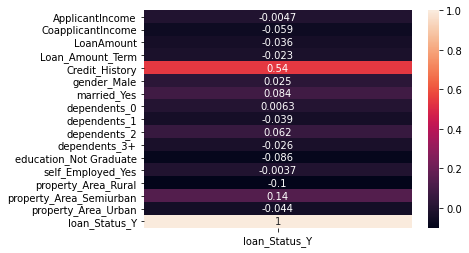

In [ ]:
corrMatrix = df.corr()
corrMatrixloan= corrMatrix[["loan_Status_Y"]]
sn.heatmap(corrMatrixloan, annot=True)
plt.show()

We can see from this correlation matrix that only the Credit history has an impact, we dropped columns 1 by 1 in the next code part and noticed no change on our model predictions.

## 1.4. Dropping uncorrelataed columns.

In [ ]:


df = df.drop(columns=['Loan_ID'])

df = df.drop(columns="ApplicantIncome")

df = df.drop(columns="CoapplicantIncome")

df = df.drop(columns="LoanAmount")

df = df.drop(columns="gender_Male")


df = df.drop(columns="Loan_Amount_Term")

df = df.drop(columns="married_Yes")

tokeep = [c for c in df.columns if c.lower()[:6] != 'depend']
df=df[tokeep]

tokeep = [c for c in df.columns if c.lower()[:6] != 'educat']
df=df[tokeep]

tokeep = [c for c in df.columns if c.lower()[:4] != 'self']
df=df[tokeep]

tokeep = [c for c in df.columns if c.lower()[:6] != 'proper']
df=df[tokeep]
df

,Credit_History,loan_Status_Y
0,1.0,1
1,1.0,0
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
609,1.0,1
610,1.0,1
611,1.0,1
612,1.0,1


Droping our values and keeping only the credit history allows to compute the results a lot faster reducing the number of iterations from around 1000 to 100.

## 1.5. Preparing our Data before the spliting in train test dataframes

In [ ]:
Xdata=df #Split X Y
Xdata = Xdata.drop(columns=['loan_Status_Y'])
print(Xdata.head(10))
Ydata=df[['loan_Status_Y']]
print(Ydata.head(10))

   Credit_History
0             1.0
1             1.0
2             1.0
3             1.0
4             1.0
5             1.0
6             1.0
7             0.0
8             1.0
9             1.0
   loan_Status_Y
0              1
1              0
2              1
3              1
4              1
5              1
6              1
7              0
8              1
9              0


# 2. Function definition

## 2.1. Zscaling function to scale our features

We used a min max scaling this time to have only values beetween 0 and 1, like our sigmoid.

In [ ]:
def Zscaling(dataframe): #scale our features
    for column in dataframe:
        colmin= dataframe[column].min()
        colmax= dataframe[column].max()
        dataframe[column] = ( dataframe[column]-colmin)/(colmax-colmin)
    return dataframe

## 2.2. Costfunction to calculate the cost of our model

In [ ]:
def costfunction(Yhat, Ydata): #calculate the cost
    m = len(Ydata)
    result = (-1/m)* np.sum(  Ydata*np.log(Yhat )+(1-Ydata)*np.log(1-Yhat)   )     
    return result

## 2.3. Sigmoid function

In [ ]:
def sigmoid(x) :
    result =  1/(1+np.exp(-x))
    return result

## 2.4. Batch Gradiant Descent function

### Logisitc regression from batch gradient

In [ ]:
def batch_gradient_descent(Xdata, Ydata, theta, alpha, iterations, delta): #from scratch gradient descent
 cost_history =[]
 m = len(Ydata)
 for iteration in range(iterations):

    #Values predicted at each iteration of the model
    h = Xdata.dot(theta)
    z = sigmoid(h)


    # Gradient Calculation
    gradient = (1/m)*(np.transpose(Xdata)).dot((z-Ydata))

    # Changing Values of theta using Gradient
    theta = theta - (alpha * gradient) 

    # New Cost Value added to the cost list
    cost = costfunction(z, Ydata)
    type(cost)
    cost_history.append(cost)
    if( (iteration!= 0 and 1-np.abs(cost_history[-1])/np.abs(cost_history[-2]) < delta) or (iteration==iterations-1) ): # If the new cost² is inferrior to a delta % of last cost² or we reach max iteration we print and leave the loop  
      print("done in ")
      print(iteration+1)
      print("previous cost")
      print(cost_history[-2])
      print("last cost")
      print(cost_history[-1])


      break
    if(iteration!=0 and np.abs(cost_history[-1])>np.abs(cost_history[-2] )): # if we go to far we reduce our learning rate alpha
      alpha = alpha/1.5

 return theta, cost_history

## 2.5. Prediction function

In [ ]:
def pred(Xdata, theta):

	Yhat=Xdata.dot(theta)
	z = sigmoid(Yhat)

	return z

## 2.6. Correlation Matrix function

In [ ]:
def corr_matrix(Ytest,Yhat):
    df_Ytest = pd.DataFrame(Ytest)
    df_Yhat = pd.DataFrame(Yhat)
    corr_matrix_df = pd.concat([df_Ytest, df_Yhat], axis=1)
    corr_matrix_df['True Positive'] = ((df_Ytest == 1) & (df_Yhat == 1)).astype(int)
    corr_matrix_df['True Negative'] = ((df_Ytest == 0) & (df_Yhat == 0)).astype(int)
    corr_matrix_df['False Positive'] = ((df_Ytest == 0) & (df_Yhat == 1)).astype(int)
    corr_matrix_df['False Negative'] = ((df_Ytest == 1) & (df_Yhat == 0)).astype(int)
    print('True Negative: ',sum(corr_matrix_df['True Negative']),' False Positive: ',sum(corr_matrix_df['False Positive']))
    print('False Negative: ',sum(corr_matrix_df['False Negative']),' True Positive: ',sum(corr_matrix_df['True Positive']))
    return corr_matrix_df

## 2.7. Precision score function

In [ ]:
def precision(corr_matrix_df):
    TP = sum(corr_matrix_df['True Positive'])
    FP = sum(corr_matrix_df['False Positive'])
    return (TP/(TP+FP))

## 2.8. Recall score function

In [ ]:
def recall(corr_matrix_df):
    TP = sum(corr_matrix_df['True Positive'])
    FN = sum(corr_matrix_df['False Negative'])
    return (TP/(TP+FN))

## 2.9. Accuracy score function

In [ ]:
def accuracy(corr_matrix_df):
    TP = sum(corr_matrix_df['True Positive'])
    FN = sum(corr_matrix_df['False Negative'])
    FP = sum(corr_matrix_df['False Positive'])
    TN = sum(corr_matrix_df['True Negative'])
    return ((TP+TN)/(TP + TN + FP + FN))

## 2.10. F1 score function

In [ ]:
def F1(precision_score_, recall_score_):
    return 2*((precision_score_*recall_score_)/(precision_score_+recall_score_))

# 3. Regression

## 3.1. Data Scaling

In [ ]:
Xscaled= Zscaling(Xdata)


print(Xscaled.head(10))

   Credit_History
0             1.0
1             1.0
2             1.0
3             1.0
4             1.0
5             1.0
6             1.0
7             0.0
8             1.0
9             1.0


This scaling part is now useless as we removed most of our data and Credit history is already binary but we kept it here in case we need it.

## 3.2. Creation of the offset and spliting our data in test and split data frames

In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(Xscaled,Ydata,random_state = 8,test_size=0.33)
Xtrain=Xtrain.to_numpy()
Xtest=Xtest.to_numpy()
Ytrain=Ytrain.to_numpy()
Ytest=Ytest.to_numpy()

We split our dataset as train and test sets and transform them to numpy to use them latter.

## 3.3. Linear Regression Model Training

done in 
100
previous cost
0.5662541258552789
last cost
0.5662535990661869
Theta result:
 [[1.17170645]]
Plot of the entirety of the cost history and last 10 iterations:


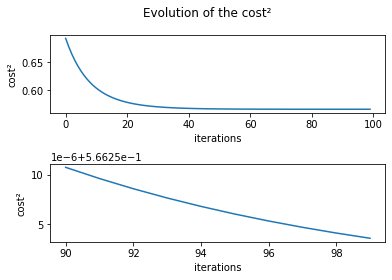

In [ ]:
theta = np.zeros(Xtrain.shape[1]) # we create an array of 0's of the number of features and turn it vertically using np.vstack
theta = np.vstack(theta)

newTheta, cost_history = batch_gradient_descent(Xtrain, Ytrain, theta, alpha, iter_,delta)

print("Theta result:\n",newTheta)
#roundedcostforplot = cost_history.round(decimals=2)

fig, axs = plt.subplots(2)

fig.tight_layout(pad=3.0)
fig.suptitle('Evolution of the cost²')

axs[0].plot(np.arange(len(cost_history)),cost_history)
axs[0].set(xlabel="iterations")
axs[0].set(ylabel="cost²")

axs[1].plot(np.arange(len(cost_history)-10, len(cost_history)  ),cost_history[-10:])
axs[1].set(xlabel="iterations")
axs[1].set(ylabel="cost²")
print("Plot of the entirety of the cost history and last 10 iterations:")

## 3.4. Evaluation and plot of our Model

We Sort our array and set a threshold at 0.5 to set all our values to either 0 or 1



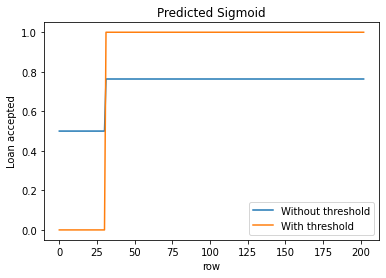

In [ ]:

Yhat = pred(Xtest,newTheta)

Yhatsorted=	 np.hstack(Yhat)
Yhatsorted = np.sort(Yhatsorted)
plt.plot(Yhatsorted,label="Without threshold")
plt.title("Predicted Sigmoid")

print("We Sort our array and set a threshold at 0.5 to set all our values to either 0 or 1")
Yhat = np.where(Yhat > 0.5, 1, 0)
Yhatsorted = np.where(Yhatsorted > 0.5, 1 , 0)
plt.plot(Yhatsorted,label="With threshold")
plt.legend(loc=4)
plt.xlabel("row")
plt.ylabel("Loan accepted")
print("")


As we used dummies to repalce the N and Y from the loan status to 0 or 1 we plot 0 and 1 on the graph and not N and Y.

## 3.5. Confusion matrix and scores of our model

In [ ]:
corr_matrix_df = corr_matrix(Ytest, Yhat)
precision_score_ = precision(corr_matrix_df)
recall_score_ = recall(corr_matrix_df)
accuracy_score_ = accuracy(corr_matrix_df)
F1_score_ = F1(precision_score_, recall_score_)
print('Precision score of our model:',precision_score_)
print('accuracy score of our model:', accuracy_score_)
print('recall score of our model:',recall_score_)
print('F1 score of our model:', F1_score_)


True Negative:  30  False Positive:  27
False Negative:  1  True Positive:  145
Precision score of our model: 0.8430232558139535
accuracy score of our model: 0.8620689655172413
recall score of our model: 0.9931506849315068
F1 score of our model: 0.9119496855345913


# 4. Comparing With Sklearn

## 4.1. implementation with sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
classifier = LogisticRegression(random_state = 0)
classifier.fit(Xtrain, np.ravel(Ytrain))

Yhat = classifier.predict(Xtest)

cm = confusion_matrix(Ytest, Yhat)
print(cm)
skprecision = precision_score(Ytest, Yhat)
skaccuracy = accuracy_score(Ytest,Yhat)
skrecall = recall_score(Ytest,Yhat)
skF1 = f1_score(Ytest, Yhat)
print('sklearn precision score:',skprecision)
print('sklearn accuracy score:', skaccuracy)
print('sklearn recall score:', skrecall)
print('sklearn F1 score:', skF1)


[[ 30  27]
 [  1 145]]
sklearn precision score: 0.8430232558139535
sklearn accuracy score: 0.8620689655172413
sklearn recall score: 0.9931506849315068
sklearn F1 score: 0.9119496855345913


## 4.2. Comparison between our implementation and the sklearn implementation

In [ ]:
skmodel = LinearRegression().fit(Xtrain, Ytrain)
skpredict= skmodel.predict(Xtest)
print("sklearn model precision score:",precision_score(Ytest,Yhat),"\nOur model precision score:",precision_score_,
"\n\nsklearn model accuracy score:", skaccuracy, "\nOur model accuracy score:", accuracy_score_,
"\n\nsklearn model recall score:", skrecall, "\nOur model recall score:", recall_score_,
"\n\nsklearn model F1 score:", skF1, "\nOur model F1 score:", F1_score_)


sklearn model precision score: 0.8430232558139535 
Our model precision score: 0.8430232558139535 

sklearn model accuracy score: 0.8620689655172413 
Our model accuracy score: 0.8620689655172413 

sklearn model recall score: 0.9931506849315068 
Our model recall score: 0.9931506849315068 

sklearn model F1 score: 0.9119496855345913 
Our model F1 score: 0.9119496855345913


We have exactly the same result as the sklearn model showing that our implementation is optimal for the model and for the metrics calculations.

# Conclusion

The Credit_history feature is the most important one to decide whether or not the loan request will be granted, if they have a good credit history they'll be receiving their loan. The other features aren't correlated enough to the Loan_Status to be relevant.  
Having more data in general would be appreciated in order to improve our predictions, in the Credit_History feature, some cells were missing so we replaced them by the most common value and it affects the precision of our model as we can't guess the true value.  
We think that others parameters are taken into account to grant or not the Loan, perhaps the account balance history, the date of registration of the customer in the bank (a regular client may have its loan request easily than a new client). The banker also makes his choice when speaking to the client which is not transcrible as data to use in our model.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ed6b7ae-2406-4749-b23e-cd3909d8f028' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>